# 01: Neural Network Regression with TensorFlow

As we all know that, there are many pre-defined definitions for a [`regression_problem`](https://en.wikipedia.org/wiki/Regression_analysis) but in our case, to simplify it to be: predicting a number:

For example, you might want to:
* Estimate or predict the cost of medical insurance based on a person's demographics (age, gender, sex, race).
* Estimate or predict the price of a property based on the information you have about it (such as number of rooms, number of bathrooms)
* Estimate or predict the co-ordinate of a bounding box of an item in an image.

In this notebook, we are going to set the foundations for how can you build a neural network to detect patterns in a sample of inputs (this is your data), and then making a estimation/prediction (in a form of a number) based on those inputs.

## What we are going to cover?

Specially, we will go through how to use `TensorFlow` to perform the following:

* Architecture of the regression model
* Input shapes and output shapes
    * `X`: Feature / Data (inputs)
    * 'y': Label / Target (outputs)
* Creating custom data to view and fit
* Steps in modelling 
    * Creating a model
    * Compiling a model
        * Defining a loss function
        * Setting up an optimizer 
        * Creating an evaluation metrics
    * Fitting a model (getting it to find patterns in your data)
* Evaluating a model
    * Visualizing the model (`"(3V) visualize, visualize, and visualize"`)
    * Looking at training curves
    * Compare estimations/predictions to ground truth (using our evaluation metrices)
* Saving a model (So we can use it for later)
* Loading a saved model

> 🔑 **Note:** Don't worry if none of these make sense right now, we'll go through each of them one by one.

## How you can use this notebook?

You can go through the explanations and code (everything should work), but there's a better way to run code.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

## Typical architecture of a regression neural network

The word `typical` is on purpose. 

Why?

Because there are so many distict methods to build a neural networks (almost an unlimited number of ways).

However, the following is a typical framework for taking a set of numbers, detecting patterns in them, and then getting a target number.

Yes, we know the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we will import as the common alias `tf`

In [1]:
import tensorflow as tf
print(tf.__version__)

2022-01-09 16:57:13.863277: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-09 16:57:13.863317: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.7.0


## Creating data to view and fit 

As we have discussed already about this notebook, so let's create some linear data (a straight line) to model for predicting a number. 

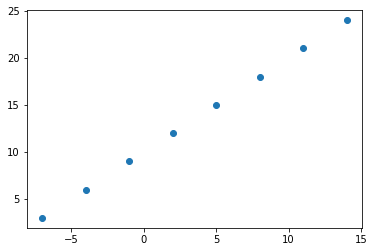

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features / input data
X = np.array([14.0, 11.0, 8.0, 5.0, 2.0, -1.0, -4.0, -7.0])

# Create label/target
y = np.array([24.0, 21.0, 18.0, 15.0, 12.0, 9.0, 6.0, 3.0])

# visualize 
plt.scatter(X, y)

A question may arise in your mind, can you compute the pattern between `X` and `y` before we start modeling?

For example, if someone asked you, what would be the value of `y` if the value of `X` was found 19.0 or -15.0?

This is the essence of what we'll be building neural network to perform for us.


## Regression Input and Output Shapes

One of the most important concepts when building a neural network are the input and output shapes.

* The <b> input shape </b> is the shape of your data that goes into the model
* The <b> output shape </b> is the shape of your data you want to come out of your model.

The input and output shape will be differ based on the problem statement or depend on the problem you are working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Similar to NumPy Array, we could do same with tensors.

In [3]:
# input and output shapes of a regression model

building_info = tf.constant(['garage', 'bedrooms', 'bathrooms'])
building_price = tf.constant([939700])

2022-01-09 16:57:20.538265: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-01-09 16:57:20.538317: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linus-Inspiron-3543): /proc/driver/nvidia/version does not exist
2022-01-09 16:57:20.540282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
print('Information of building: ', building_info)
print('Price of building: ', building_price)

Information of building:  tf.Tensor([b'garage' b'bedrooms' b'bathrooms'], shape=(3,), dtype=string)
Price of building:  tf.Tensor([939700], shape=(1,), dtype=int32)


In [5]:
print('Shape of input data:', building_info.shape)
print('Shape of output data:', building_price.shape)

Shape of input data: (3,)
Shape of output data: (1,)


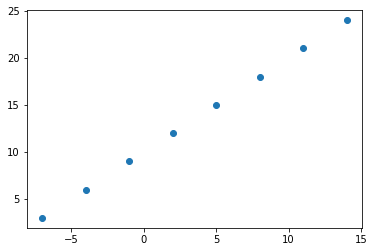

In [6]:
# use tensors for first example

# Create features / input data
X = tf.constant([14.0, 11.0, 8.0, 5.0, 2.0, -1.0, -4.0, -7.0])

# Create label/target
y = tf.constant([24.0, 21.0, 18.0, 15.0, 12.0, 9.0, 6.0, 3.0])

# visualize 
plt.scatter(X, y)

Our goal here will be here to predict `y` using `X`.

So, our input will be `X` and output will `y`.

Now, question may arise in your mind, what do you think input and output shape will be?

Let's take a look.

In [7]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape


In [8]:
input_shape, output_shape

(TensorShape([]), TensorShape([]))

Huh?

From the above results, our inputs and outputs have no shape?

How could that be?

It is because no matter what kind of data we pass to our model, it is always going to take as input and return as output some kind of tensor.

Still Confused?? 🤔 🤔 

In our case, we are working with two small lists of numbers or in other words we can say that we are looking at a special kind of tensor, more specificially rank 0 tensor or a scalar.

In [9]:
# Let's take a look at the single example individually

X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=14.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=24.0>)

In our case, we are trying to build a model to predict the pattern between `X` and `y`

Where `X[0] is equal to 14.0 and y[0] equal to 24.0`

Now, you might be clear about what are trying to do, we are using 1 `X` value to predict 1 `y` value.

You might be thinking, "this sounds quite difficult for only predicting a straight line...."

And the answer is Big YES....

But the concepts we're covering here, the concepts of input and output shapes to a model are fundamental. 

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**.

If it doesn't make sense now, we'll see plenty more examples later on (soon you'll notice the input and output shapes can be almost anything you can imagine).

![example of input and output shapes for a housing price prediction problem](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/01-input-and-output-shapes-housing-prices.png)
*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1.*

## Steps in modelling with TensorFlow

In the above session, we have learned about data and it's input shapes and output shapes. Now, let's see how to build a Neural Network model using input and output data. 

To create and train a model, there are typically 3 fundamental steps in TensorFlow:

* **Step 01 -> Creating a model:** Using a [`Functional`](https://www.tensorflow.org/guide/keras/functional) or [`Sequential API`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) piece together the layers of a neural network  yourself or import a previously built model (known as a `Transfer Learning`)
<br> <br>
* **Step 02 -> Compiling a model:** Determing and monitoring the performance of the model (`loss/metrics`) as well as how it should improve (`optimizer`)
<br> <br>
* **step 03 -> Fitting a model:** letting the model try to find patterns in the data (how does `X` get to `y`).
<br> <br>

Let's put all of the above steps into practice by creating a model for our regression data using the [`Keras Sequential API`](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). Then we'll go through each one step by step. 

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`